# Preparation

## Import

In [1]:
import pandas as pd

## Fetch Data

In [2]:
from gspread_pandas import Spread, Client

spread = Spread('danbi2990', 'Food_Aid')

# sheet_index=0
# spread.open_sheet(sheet_index)

# df = spread.sheet_to_df(index=0, sheet=sheet_index)
'''
sheet_to_df() Parameters
----------
index : int
    col number of index column, 0 or None for no index (default 1)
header_rows : int
    number of rows that represent headers (default 1)
start_row : int
    row number for first row of headers or data (default 1)
sheet : str,int
    optional, if you want to open a different sheet first,
    see :meth:`open_sheet <gspread_pandas.client.Spread.open_sheet>`
    (default None)
'''

'\nsheet_to_df() Parameters\n----------\nindex : int\n    col number of index column, 0 or None for no index (default 1)\nheader_rows : int\n    number of rows that represent headers (default 1)\nstart_row : int\n    row number for first row of headers or data (default 1)\nsheet : str,int\n    optional, if you want to open a different sheet first,\n    see :meth:`open_sheet <gspread_pandas.client.Spread.open_sheet>`\n    (default None)\n'

In [3]:
print(dir(spread))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_ensure_auth', '_find_sheet', '_fix_merge_values', '_get_update_chunks', '_max_range_chunk_size', '_retry_get_all_values', '_retry_range', '_retry_update', '_sheet_metadata', '_spread_metadata', 'add_filter', 'clear_sheet', 'client', 'create_sheet', 'delete_sheet', 'df_to_sheet', 'email', 'find_sheet', 'freeze', 'get_sheet_dims', 'merge_cells', 'open', 'open_sheet', 'open_spread', 'pmerge_cell_ranges', 'refresh_spread_metadata', 'sheet', 'sheet_to_df', 'sheets', 'spread', 'update_cells', 'url']


## sheets

In [4]:
sheets = spread.sheets
sheets

[<Worksheet '총괄' id:840761778>,
 <Worksheet '연도' id:0>,
 <Worksheet '식량지원' id:429013884>,
 <Worksheet '비료지원' id:30034899>,
 <Worksheet '국제기구통한한국정부지원' id:1681967365>,
 <Worksheet '민간지원' id:1996580925>,
 <Worksheet '<국내 | 국제>' id:1131719710>,
 <Worksheet '주체별' id:13103562>,
 <Worksheet '분야별' id:1143268498>]

In [5]:
print(dir(sheets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_finder', '_properties', 'acell', 'add_cols', 'add_rows', 'append_row', 'cell', 'clear', 'client', 'col_count', 'col_values', 'delete_row', 'duplicate', 'export', 'find', 'findall', 'get_all_records', 'get_all_values', 'id', 'insert_row', 'range', 'resize', 'row_count', 'row_values', 'spreadsheet', 'title', 'update_acell', 'update_cell', 'update_cells', 'update_title', 'updated']


In [6]:
sheets[0].id

840761778

## df_total

In [7]:
# 단위: 만원
spread.open_sheet(0)
df_total = spread.sheet_to_df(sheet=0, index=0)
df_total.head()

,재원,주체,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,합계,전체합계(1995~2019.2)
0,정부,당국차원,0,1833738,0,0,0,0,0,0,0,121999.5,1955737.5,112616313.5
1,정부,민간단체지원,769483,206712.46,0,0,0,0,229525.54,11400,0,0,1217121,11769715
2,정부,국제기구,2170416,0,654000,233662,1325131.6,1405821,1168169.44,9956.88,0,0,6967156.92,27444823.34
3,소계,,2939899,2040450.46,654000,233662,1325131.6,1405821,1397694.98,21356.88,0,121999.5,10140015.42,151830851.8
4,민간,한적,0,161630,0,0,0,22100,37779.7,0,0,0,221509.7,17869478.6


2018년 정부의 대북지원은 12억2000만원  
2009년부터 2018년까지 정부의 대북지원은 1014억  


## df_year

In [8]:
df_year = spread.sheet_to_df(sheet=1, index=0)
df_year['정부_계'] = df_year['정부_계'].astype('float')
df_year.head()

,연도,정부_무상_당국,정부_무상_민간기금,정부_무상_국제기구,정부_무상_계,식량차관,정부_계,민간_무상(한적포함),합계
0,1995,1854,0,0,1854,0,1854.0,2,1856
1,1996,0,0,24,24,0,24.0,12,37
2,1997,0,0,240,240,0,240.0,182,422
3,1998,0,0,154,154,0,154.0,275,429
4,1999,339,0,0,339,0,339.0,223,562


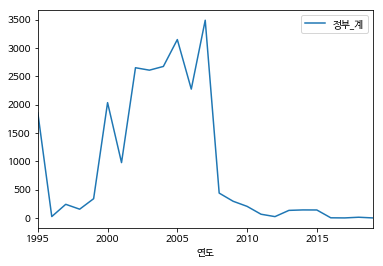

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
prop = font_manager.FontProperties(fname=path)
mpl.rcParams['font.family'] = prop.get_name()

# df_year[['연도', '정부_계']].to_csv(dir_tableau + 'year.tsv', sep='\t', index=False)

df_year.plot(x='연도', y='정부_계', kind='line')

## df_food

In [10]:
df_food = spread.sheet_to_df(sheet=2, index=0)
df_food.iloc[::, 1:-1] = df_food.iloc[::, 1:-1].astype('float')
df_food.head()

,연도,국내쌀(만톤),외국산쌀(만톤),중국 옥수수(만톤),금액(억원),형태
0,1995,15,0,0,1854,무상
1,2000,0,30,20,1057,차관방식
2,2002,40,0,0,1510,차관방식
3,2003,40,0,0,1510,차관방식
4,2004,10,30,0,1359,차관방식


In [35]:
# df_food.to_csv(dir_tableau + 'food.tsv', sep='\t', index=False)
df_food

,연도,국내쌀(만톤),외국산쌀(만톤),중국 옥수수(만톤),금액(억원),형태
0,1995,15,0,0,1854,무상
1,2000,0,30,20,1057,차관방식
2,2002,40,0,0,1510,차관방식
3,2003,40,0,0,1510,차관방식
4,2004,10,30,0,1359,차관방식
5,2005,40,10,0,1787,차관방식
6,2006,10,0,0,394,무상
7,2007,15,25,0,1505,차관방식
8,2008,0,0,0,0,
9,2009,0,0,0,0,


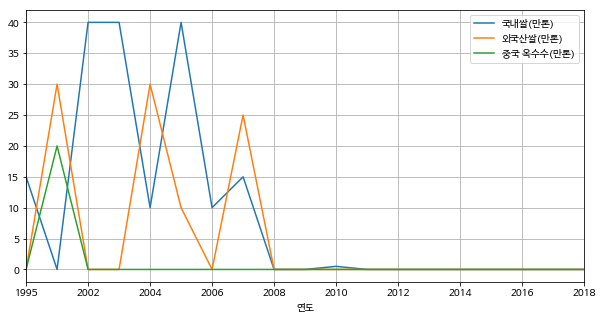

In [12]:
df_food.plot(x='연도', y=['국내쌀(만톤)', '외국산쌀(만톤)', '중국 옥수수(만톤)'], figsize=(10,5), grid=True)

## df_fertil

In [13]:
df_fertil = spread.sheet_to_df(sheet=3, index=0)
df_fertil.head()

,연도,규모,금액
0,1999,11.5만톤\n(민간 4만톤),339억원\n(민간 4만톤 포함시 462)
1,2000,30만톤,944억원
2,2001,20만톤,638억원
3,2002,30만톤,832억원
4,2003,30만톤,811억원


## df_org

In [14]:
df_org = spread.sheet_to_df(sheet=4, index=0)
df_org.head()

,연도,국제_WFP,국제_UNICEF,국제_WHO,국제_기타,합계(만불),합계(억원)
0,1996,200,100,0,5,305,24
1,1997,2053,394,70,150,2667,240
2,1998,1100,0,0,0,1100,154
3,2001,1725,0,46,0,1771,229
4,2002,1739,0,59,0,1798,243


## df_priv

In [15]:
df_priv = spread.sheet_to_df(sheet=5, index=0)
df_priv.head()

,연도,한적(억원),민간단체(억원),합계(억원)
0,1995,2,0,2
1,1996,12,0,12
2,1997,182,0,182
3,1998,275,0,275
4,1999,157,66,223


## df_doner

In [16]:
df_doner = spread.sheet_to_df(sheet=7, index=0)
df_doner['합계'] = df_doner['합계'].astype('float')
df_doner.head()

,구분,공여국,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,합계
0,DAC(개발원조위원회) 국가,Australia,4902214.21,4111936.88,5336278.33,7132321.67,4016556.28,7106324.35,6463991.12,3277426.9,233783.29,5929260.91,1831707.49,88781.87,2756694.88,5451380.18,0,0,58638658.36
1,DAC(개발원조위원회) 국가,Austria,196860.43,205919.66,706682.69,179031.77,159717.16,10248.79,10170.67,10742.61,19717.51,28362.58,0,31223.56,0,34878.53,63704.52,36670.69,1693931.17
2,DAC(개발원조위원회) 국가,Belgium,0,0,0,0,0,1107.24,426086.65,439575.56,398959.4,332935.61,337079.5,379541.6,0,1190.71,0,0,2316476.27
3,DAC(개발원조위원회) 국가,Canada,0,7701239.56,585796.13,311318.05,274462.91,2045804.3,2362815.35,4132766.07,0,2370023.51,7655025.99,940157.66,3640246.2,2473339.34,2102577.81,1483802.36,38079375.24
4,DAC(개발원조위원회) 국가,Czech Republic,0,0,0,0,0,0,0,0,0,89568.41,50818.24,34925.96,29317.73,9535.13,0,0,214165.47


In [31]:
# 단위: 달러, 500000000
df_doner_dac = df_doner.loc[df_doner['구분']=='DAC(개발원조위원회) 국가'].sort_values('합계', ascending=False)
df_doner_dac
# df_doner_dac.to_csv(dir_tableau + 'doner_dac.tsv', sep='\t', index=False)
# df_doner.sort_values('합계', ascending=False)

,구분,공여국,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,합계
22,DAC(개발원조위원회) 국가,United States,167745840.3,53787066.56,67946650.02,9341110.81,450623.42,36314961.66,154539409.5,14665451.84,5840390.84,2158563.14,2474464.59,1896281.17,2063470,1983798.77,2115459.82,0,5.233235e+08
20,DAC(개발원조위원회) 국가,Switzerland,6501997.28,6766068.26,5851449.68,7467884.59,8613641.18,7910930.03,7179234.97,7020572.17,9299091.21,9094923.84,7462387.38,10955265.47,8185676.5,10514385.62,12163266.55,8239504.22,1.332263e+08
9,DAC(개발원조위원회) 국가,Germany,54038836.19,9673192.38,8931507.05,6244813.72,3437681.43,6627306.97,5545416.07,2781892.74,2716223.52,2530570.58,3332901.97,2652538.32,2282523.27,3999799.81,2822004.16,2629448.82,1.202467e+08
19,DAC(개발원조위원회) 국가,Sweden,6022797.02,6232398.72,5904779.76,6891983.8,6305894.21,5824735.1,2649384.39,5822584.97,3915754.81,7463650.82,7062425.83,5134959.49,5689279.58,4813486.21,3757639.49,2394982.43,8.588674e+07
16,DAC(개발원조위원회) 국가,Norway,7602997.01,8028644.59,9261676.96,7651574.38,5101138.55,5535491.64,3017360.21,5707663.2,2711260.54,3386972.84,3275202.72,988620.11,1904187.62,2403524.5,1260924.48,1156117.27,6.899336e+07
0,DAC(개발원조위원회) 국가,Australia,4902214.21,4111936.88,5336278.33,7132321.67,4016556.28,7106324.35,6463991.12,3277426.9,233783.29,5929260.91,1831707.49,88781.87,2756694.88,5451380.18,0,0,5.863866e+07
3,DAC(개발원조위원회) 국가,Canada,0,7701239.56,585796.13,311318.05,274462.91,2045804.3,2362815.35,4132766.07,0,2370023.51,7655025.99,940157.66,3640246.2,2473339.34,2102577.81,1483802.36,3.807938e+07
12,DAC(개발원조위원회) 국가,Italy,6814697.39,5960852.76,11091224.98,908004.8,1200870.05,1947675.6,1590591.95,1347598.64,457953.02,426013.15,387696.18,399863.02,1018829.42,536957.29,19674.91,208114.01,3.431662e+07
8,DAC(개발원조위원회) 국가,France,421233.91,438598.01,376198.59,436299.64,685580.82,335410.7,1194992.74,273612.96,721770.18,1456409.71,1335574.68,1873629.31,14868990.02,1567798.13,882396.23,1539159.81,2.840766e+07
21,DAC(개발원조위원회) 국가,United Kingdom,4417275.32,430044.57,2555691.14,0,0,1117522.24,278498.62,57554.4,468265.66,656274.04,1291303.47,2191790.08,826291.09,1241851.92,325151.01,52970.7,1.591048e+07


In [18]:
df_doner['구분'].value_counts()

DAC(개발원조위원회) 국가      23
국제기구                 15
비 DAC(개발원조위원회) 국가     7
Name: 구분, dtype: int64

## df_field

In [19]:
df_field = spread.sheet_to_df(sheet=8, index=0)
df_field.head()

,대분류,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,합계
0,개발 식량원조/식량안보,10247620.48,1354721.94,8096225.73,3620421.02,4667496.2,5730592.73,18240757.29,3725821.27,11371357.42,5905350.8,8415893.03,10834502.51,8976411.99,14202178.54,5432040.35,5786167.84,126607559.1
1,공공행정 및 시민단체,319705.88,6583483.83,886639.92,2201215.93,1914603.29,9530698.72,1654331.3,3853686.2,2345478.44,3159720.44,2246178.19,2561519.74,4780094.93,4370196.37,3163154.04,2303829.98,51874537.2
2,"공업, 광업 및 건설",2108.45,463.41,556412.94,1000902.32,841732.16,143187.06,60632.99,44922.87,-37762.22,29941.49,0,3358.99,3304.06,62006.07,3236.48,0,2714447.07
3,관광,0,0,0,0,0,0,0,0,0,0,0,0,0,0,352.6,0,352.6
4,교육,1192673.05,3172743.2,2079940.69,1690066.54,1926215.76,2007366.34,2394724.6,2126999.53,3588266.2,2660125.44,3743879.1,3953380.52,13484627.91,3489391.02,917893.05,1111575.36,49539868.31


In [20]:
df_field['대분류'].value_counts().count()

27

In [21]:
total = df_field.iloc[::, 1:].astype('float').sum()
total2 = ['합계'] + total.to_list()
total2
tmp = pd.DataFrame(columns=df_field.columns, data=[total2])
# print(tmp)
df_field2 = df_field.append(tmp).reset_index(drop=True)
df_field2.iloc[::, 1:] = df_field2.iloc[::, 1:].astype('float')
df_field2

idx_total = df_field2['대분류']=='합계'
# print(idx_total)
total3 = float(df_field2.loc[idx_total, '합계'])
print(total3)

df_field2['합계_비율'] = df_field2['합계'] / total3 * 100
df_field2

1895170766.1799996


,대분류,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,합계,합계_비율
0,개발 식량원조/식량안보,1.02476e+07,1.35472e+06,8.09623e+06,3.62042e+06,4.6675e+06,5.73059e+06,1.82408e+07,3.72582e+06,1.13714e+07,5.90535e+06,8.41589e+06,1.08345e+07,8.97641e+06,1.42022e+07,5.43204e+06,5.78617e+06,1.26608e+08,6.68054
1,공공행정 및 시민단체,319706,6.58348e+06,886640,2.20122e+06,1.9146e+06,9.5307e+06,1.65433e+06,3.85369e+06,2.34548e+06,3.15972e+06,2.24618e+06,2.56152e+06,4.78009e+06,4.3702e+06,3.16315e+06,2.30383e+06,5.18745e+07,2.7372
2,"공업, 광업 및 건설",2108.45,463.41,556413,1.0009e+06,841732,143187,60633,44922.9,-37762.2,29941.5,0,3358.99,3304.06,62006.1,3236.48,0,2.71445e+06,0.14323
3,관광,0,0,0,0,0,0,0,0,0,0,0,0,0,0,352.6,0,352.6,1.86052e-05
4,교육,1.19267e+06,3.17274e+06,2.07994e+06,1.69007e+06,1.92622e+06,2.00737e+06,2.39472e+06,2.127e+06,3.58827e+06,2.66013e+06,3.74388e+06,3.95338e+06,1.34846e+07,3.48939e+06,917893,1.11158e+06,4.95399e+07,2.61401
5,금융 및 재정서비스,0,0,59577.5,550900,1.1772e+06,96936.8,36065.6,61989.6,-27988.5,0,0,0,0,0,0,0,1.95469e+06,0.10314
6,기타 다부문,1.0243e+06,962351,2.34596e+06,1.57302e+06,3.75964e+06,3.04487e+07,1.71788e+06,1.77635e+06,1.74282e+06,1.114e+06,791671,1.11127e+06,2.15432e+06,2.17327e+06,1.23239e+06,1.33097e+06,5.5259e+07,2.91578
7,기타 사회 인프라 및 서비스,805911,633310,564998,3.12551e+06,1.02676e+06,1.50555e+06,1.08785e+06,886470,1.35256e+06,854693,423068,877224,177649,677867,139530,387520,1.45265e+07,0.7665
8,기타 소비재 지원,0,0,0,0,0,0,5.74473e+07,0,0,0,0,0,0,0,0,0,5.74473e+07,3.03125
9,긴급 구호,1.23697e+08,7.83217e+07,9.45999e+07,4.95949e+07,3.23852e+07,4.7402e+07,1.07627e+08,3.20933e+07,1.72711e+07,5.05403e+07,2.86502e+07,1.8899e+07,1.60827e+07,1.75145e+07,1.71797e+07,2.36367e+07,7.55495e+08,39.8642


In [22]:
df_field2[['대분류', '합계']].sort_values('합계', ascending=False)

,대분류,합계
27,합계,1.89517e+09
9,긴급 구호,7.55495e+08
13,보건,2.48424e+08
14,부채 관련 행위,1.82625e+08
0,개발 식량원조/식량안보,1.26608e+08
18,에너지,1.239e+08
8,기타 소비재 지원,5.74473e+07
6,기타 다부문,5.5259e+07
1,공공행정 및 시민단체,5.18745e+07
4,교육,4.95399e+07


In [23]:
df_field2[['대분류', '합계_비율']].sort_values('합계_비율', ascending=False)

,대분류,합계_비율
27,합계,100
9,긴급 구호,39.8642
13,보건,13.1083
14,부채 관련 행위,9.63633
0,개발 식량원조/식량안보,6.68054
18,에너지,6.53768
8,기타 소비재 지원,3.03125
6,기타 다부문,2.91578
1,공공행정 및 시민단체,2.7372
4,교육,2.61401


## df_hunger

In [24]:
dir_item = '/home/jake/Documents/News_Item/'
dir_proj = dir_item + 'Food_Aid/'
dir_tableau = dir_proj + 'tableau_data/'

tmp = pd.read_excel(dir_proj + '영양부족인구_북한.xls', sheet_name=0, header=3)
tmp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,"Korea, Dem. People’s Rep.",PRK,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,40.8,41.6,41.8,41.9,41.7,41.4,41,40.8,43.4,NaN


In [34]:
df_hunger = tmp.melt(id_vars=['Country Name'], value_vars=[str(x) for x in range(2000, 2017)], var_name='연도', value_name='영양부족인구비율')
# df_hunger.to_csv(dir_tableau + 'hunger.tsv', sep='\t', index=False)
df_hunger

,Country Name,연도,영양부족인구비율
0,"Korea, Dem. People’s Rep.",2000,37.5
1,"Korea, Dem. People’s Rep.",2001,37.1
2,"Korea, Dem. People’s Rep.",2002,35.5
3,"Korea, Dem. People’s Rep.",2003,34.5
4,"Korea, Dem. People’s Rep.",2004,34.1
5,"Korea, Dem. People’s Rep.",2005,35.4
6,"Korea, Dem. People’s Rep.",2006,37.3
7,"Korea, Dem. People’s Rep.",2007,39.3
8,"Korea, Dem. People’s Rep.",2008,40.8
9,"Korea, Dem. People’s Rep.",2009,41.6


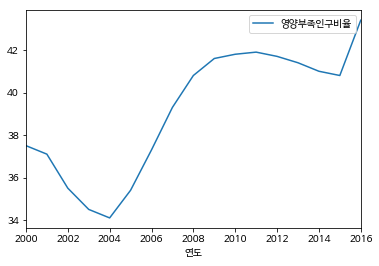

In [26]:
df_hunger.plot(kind='line', x='연도', y='영양부족인구비율')

## sheets

In [27]:
sheets

[<Worksheet '총괄' id:840761778>,
 <Worksheet '연도' id:0>,
 <Worksheet '식량지원' id:429013884>,
 <Worksheet '비료지원' id:30034899>,
 <Worksheet '국제기구통한한국정부지원' id:1681967365>,
 <Worksheet '민간지원' id:1996580925>,
 <Worksheet '<국내 | 국제>' id:1131719710>,
 <Worksheet '주체별' id:13103562>,
 <Worksheet '분야별' id:1143268498>]